In [105]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

!pip install scipy
from scipy.stats import ttest_ind

In [106]:
sample = 1000
age = np.random.normal(35, 10, sample)
height = np.random.normal(170, 15, sample)
weight = np.random.normal(70, 10, sample)
gender = np.random.choice(['Male', 'Female'], sample)
income = np.random.normal(50000, 15000, sample)

data = pd.DataFrame({'Age': age, 'Height': height, 'Weight': weight, 'Gender': gender, 'Income': income})

In [107]:
statistics = data[['Age', 'Height', 'Weight', 'Income']].agg(['mean', 'median', 'std', 'var'])
print(statistics)

               Age      Height      Weight        Income
mean     34.934710  170.342455   70.036906  5.023808e+04
median   35.339583  170.427101   70.102792  4.976381e+04
std      10.676560   15.213176   10.033620  1.460041e+04
var     113.988942  231.440716  100.673522  2.131720e+08


In [108]:
modeGender = data['Gender'].mode()[0]
print(f"Mode for Gender: {modeGender}")

Mode for Gender: Male


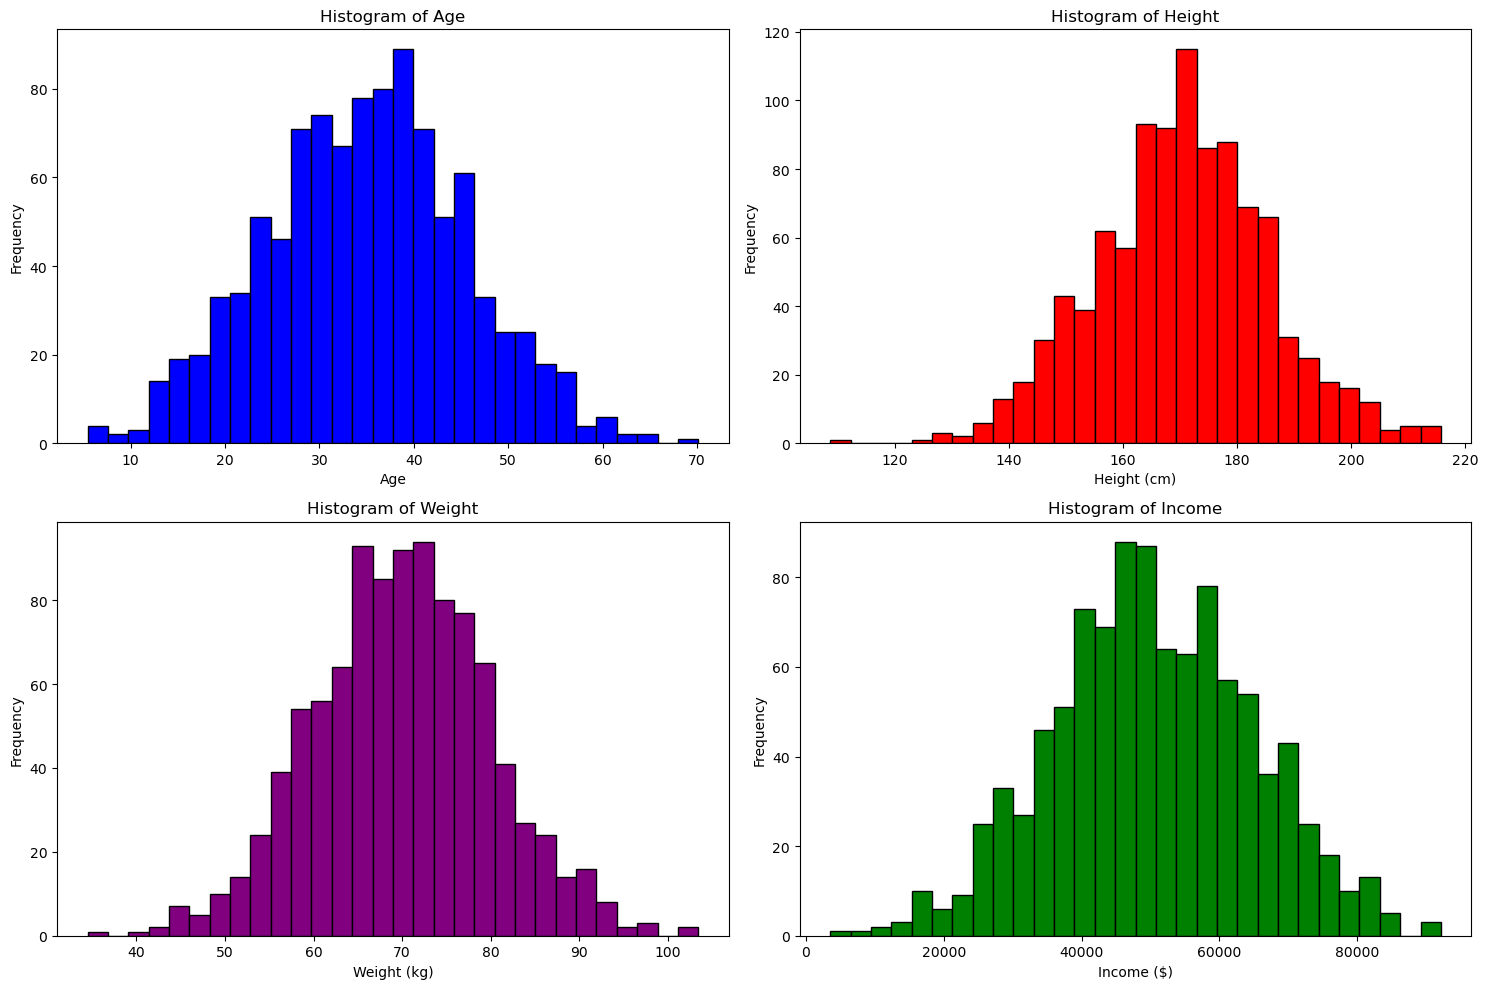

/var/folders/1t/rhj583ns4zvf32p75ksylrx40000gn/T/ipykernel_98128/1932917055.py:34: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Age'], shade=True, color='blue')
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/1t/rhj583ns4zvf32p75ksylrx40000gn/T/ipykernel_98128/1932917055.py:39: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Height'], shade=True, color='red')
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

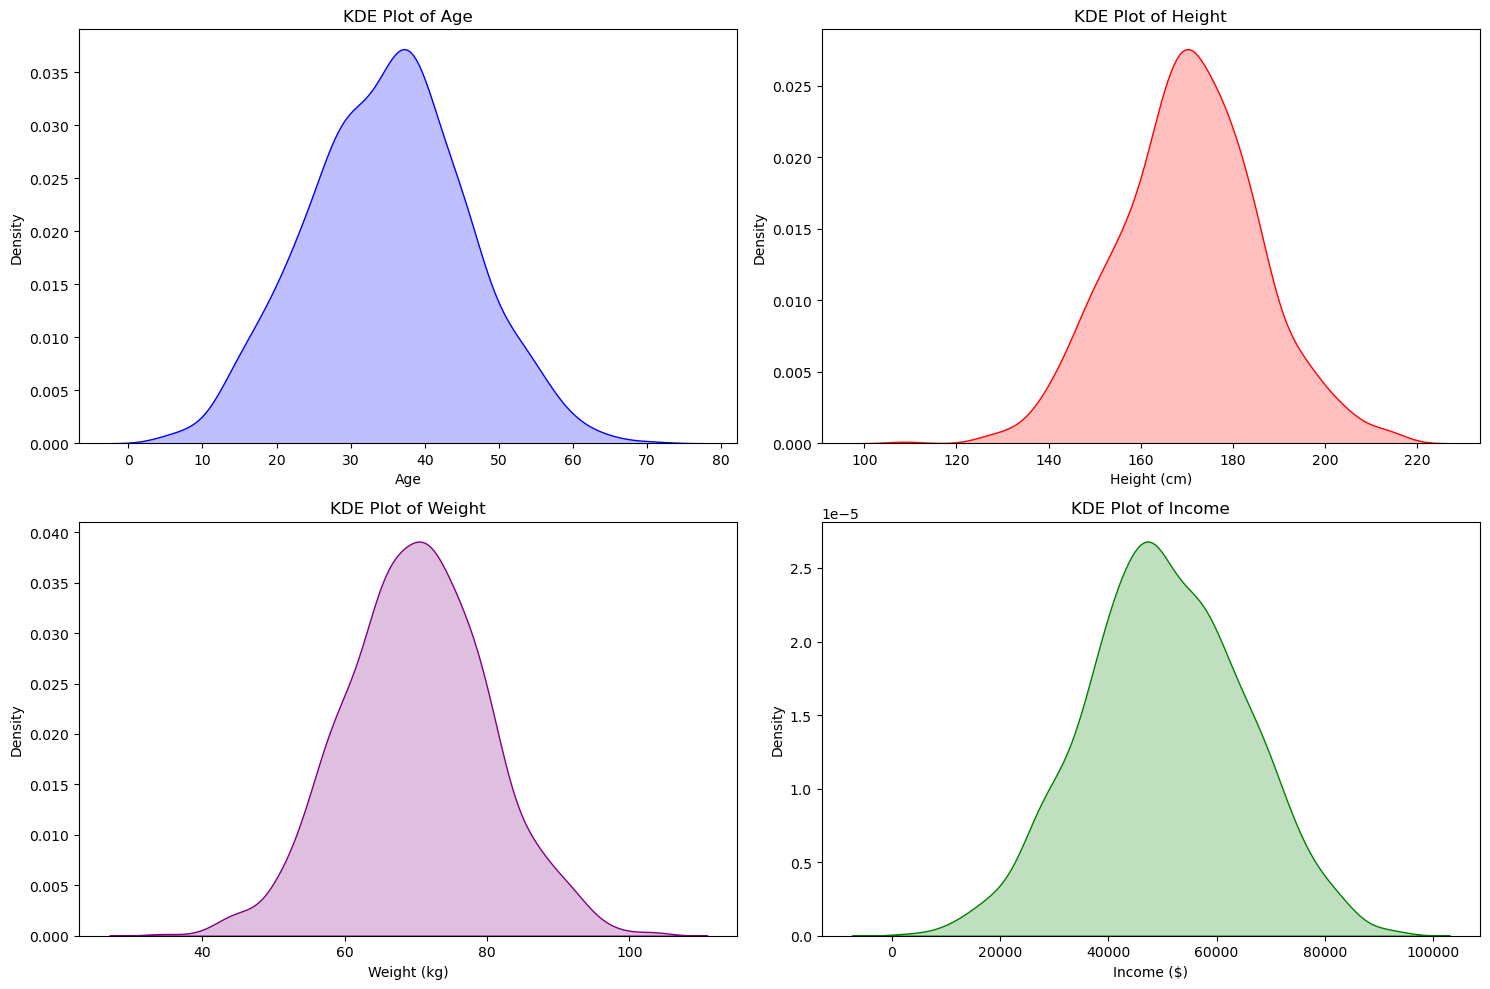

In [109]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.hist(data['Age'], bins=30, color='blue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(data['Height'], bins=30, color='red', edgecolor='black')
plt.title('Histogram of Height')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(data['Weight'], bins=30, color='purple', edgecolor='black')
plt.title('Histogram of Weight')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(data['Income'], bins=30, color='green', edgecolor='black')
plt.title('Histogram of Income')
plt.xlabel('Income ($)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Plot KDE plots
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.kdeplot(data['Age'], shade=True, color='blue')
plt.title('KDE Plot of Age')
plt.xlabel('Age')

plt.subplot(2, 2, 2)
sns.kdeplot(data['Height'], shade=True, color='red')
plt.title('KDE Plot of Height')
plt.xlabel('Height (cm)')

plt.subplot(2, 2, 3)
sns.kdeplot(data['Weight'], shade=True, color='purple')
plt.title('KDE Plot of Weight')
plt.xlabel('Weight (kg)')

plt.subplot(2, 2, 4)
sns.kdeplot(data['Income'], shade=True, color='green')
plt.title('KDE Plot of Income')
plt.xlabel('Income ($)')

plt.tight_layout()
plt.show()

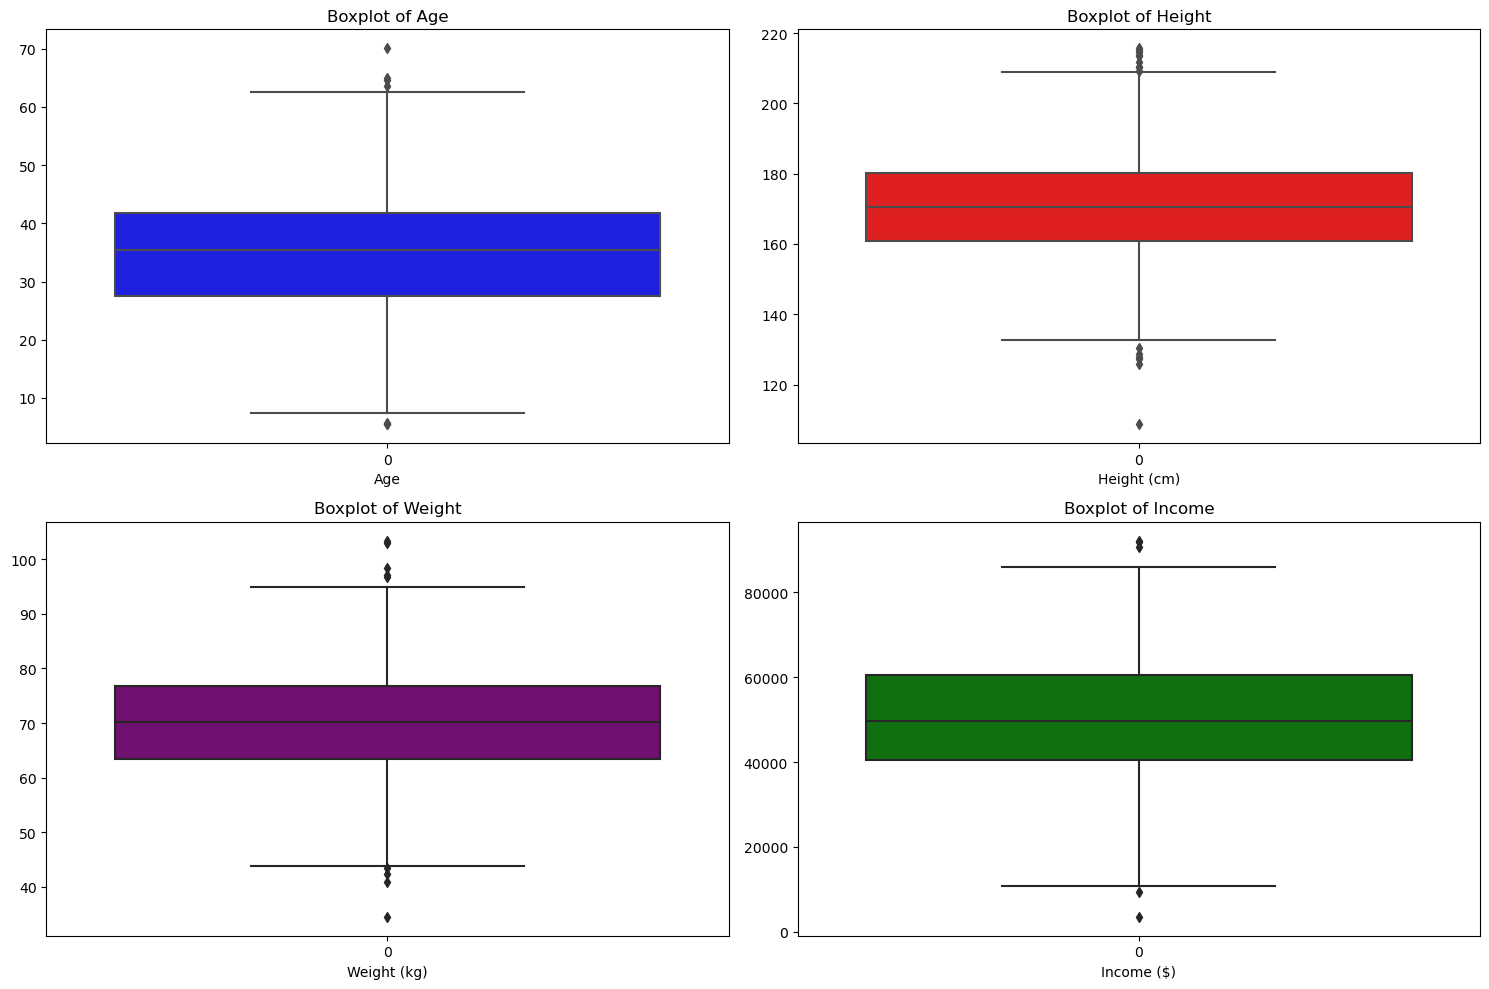

In [110]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.boxplot(data['Age'], color='blue')
plt.title('Boxplot of Age')
plt.xlabel('Age')

plt.subplot(2, 2, 2)
sns.boxplot(data['Height'], color='red')
plt.title('Boxplot of Height')
plt.xlabel('Height (cm)')

plt.subplot(2, 2, 3)
sns.boxplot(data['Weight'], color='purple')
plt.title('Boxplot of Weight')
plt.xlabel('Weight (kg)')

plt.subplot(2, 2, 4)
sns.boxplot(data['Income'], color='green')
plt.title('Boxplot of Income')
plt.xlabel('Income ($)')

plt.tight_layout()
plt.show()

In [111]:
correlation_matrix = data[['Age', 'Height', 'Weight', 'Income']].corr()
print(correlation_matrix)

             Age    Height    Weight    Income
Age     1.000000  0.006211 -0.066988 -0.037308
Height  0.006211  1.000000 -0.013166  0.002562
Weight -0.066988 -0.013166  1.000000  0.009185
Income -0.037308  0.002562  0.009185  1.000000


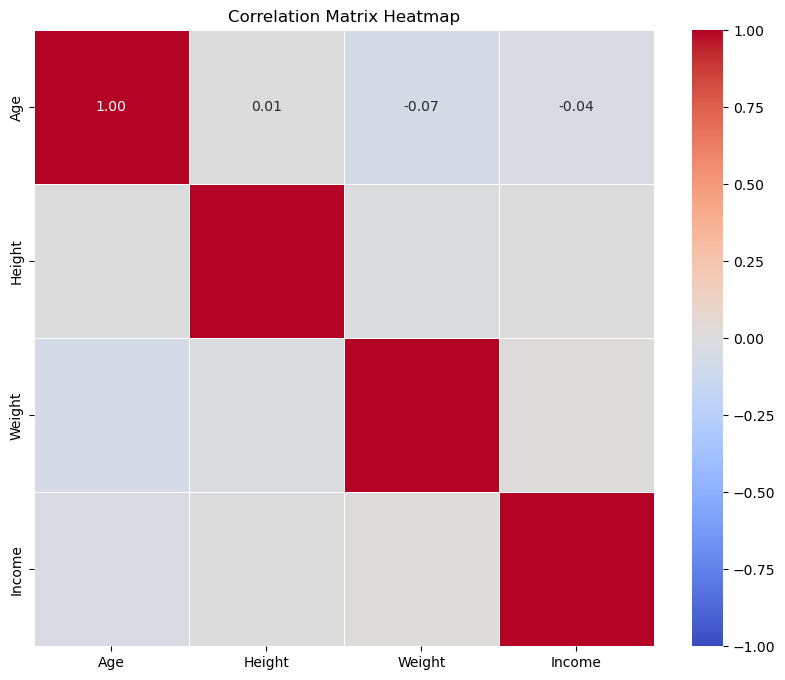

In [112]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [113]:
income_male = data[data['Gender'] == 'Male']['Income']
income_female = data[data['Gender'] == 'Female']['Income']

# Perform the t-test
t_stat, p_value = ttest_ind(income_male, income_female)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Determine significance
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in Income between Male and Female.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in Income between Male and Female.")

T-statistic: -0.03946108574267497
P-value: 0.9685306706791869
Fail to reject the null hypothesis: There is no significant difference in Income between Male and Female.
